In [68]:
import numpy as np 
import matplotlib.pyplot as plt  
import ipywidgets as widgets

In [83]:
lambd_init = 0.85 # arrival rate in k wafers/week, poisson distributed 
mu_init = 0.9 # production rate in k wafers/week, poisson distributed 
style = {'description_width': 'initial'}
mu = widgets.FloatSlider(
    value=mu_init,
    min=0.01,
    max=10,
    step=0.01,
    description='Production rate in k wafers/week, poisson distributed:',
    disabled=False,
    layout=widgets.Layout(width='500px'),
    style=style)

lambd = widgets.FloatSlider(
    value=lambd_init,
    min=0.01,
    max=mu_init,
    step=0.01,
    description='Order arrival rate in k wafers/week, poisson distributed:',
    disabled=False,
    layout=widgets.Layout(width='500px'),
    style=style)


In [77]:
def drawPlot(p,W,p_chart,W_chart):
    plt.plot(p_chart*100,W_chart) 
    plt.plot(p*100, W, 'ro')
    plt.grid("on")
    plt.title("Waiting time based on utilization") 
    plt.xlabel("Utilization (%)")
    plt.ylabel("Waiting time (weeks)")
    plt.axvline(p*100, color='r',lw=0.5) # vertical
    plt.axhline(W, color='r',lw=0.5) # horizontal

In [116]:
def updatePlot(lambd,mu): 
    W=1/(mu-lambd) # waiting time in system in weeks 
    p=lambd/mu # utilization in % 
    p_chart=np.arange(0,1,0.01)
    W_chart=1/(mu*(1-p_chart))
    drawPlot(p,W,p_chart,W_chart) 
    plt.show()
    printOutput(p,W)
    
def printOutput(p,W):
    print('Utilization: {:.1f}%'.format(p*100))
    print('Waiting time: {:.1f} weeks'.format(W))


In [117]:
def updateMaxLambda(*args): 
    lambd.max=mu.value-0.01

mu.observe(updateMaxLambda, 'value')
 

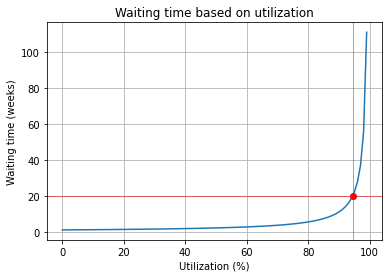

Utilization: 94.4%
Waiting time: 20.0 weeks


In [118]:
widgets.interactive(updatePlot, lambd=lambd,mu=mu)